# Optimization Using Gradient Descent: Linear Regression

In this exercise, I will build a simple linear regression model to predict house prices based on number of median household income and number of bedrooms. I will investigate three different approaches to this problem. Using `NumPy` and `Scikit-Learn` linear regression models, as well as constructing and optimizing the sum of squares cost function with gradient descent from scratch.

In [1]:
#Load the required packages:
import numpy as np
# A library for programmatic plot generation.
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd
# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression

In [2]:
path = r"C:\Users\abdul\OneDrive\Desktop\Linear Regression\raw.githubusercontent.com_alexeygrigorev_datasets_master_housing.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
new_data = data[["median_income","total_bedrooms"]]

In [5]:
new_data

,median_income,total_bedrooms
0,8.3252,129.0
1,8.3014,1106.0
2,7.2574,190.0
3,5.6431,235.0
4,3.8462,280.0
...,...,...
20635,1.5603,374.0
20636,2.5568,150.0
20637,1.7000,485.0
20638,1.8672,409.0


In [6]:
df = new_data

In [7]:
df.info

<bound method DataFrame.info of        median_income  total_bedrooms
0             8.3252           129.0
1             8.3014          1106.0
2             7.2574           190.0
3             5.6431           235.0
4             3.8462           280.0
...              ...             ...
20635         1.5603           374.0
20636         2.5568           150.0
20637         1.7000           485.0
20638         1.8672           409.0
20639         2.3886           616.0

[20640 rows x 2 columns]>

In [8]:
df

,median_income,total_bedrooms
0,8.3252,129.0
1,8.3014,1106.0
2,7.2574,190.0
3,5.6431,235.0
4,3.8462,280.0
...,...,...
20635,1.5603,374.0
20636,2.5568,150.0
20637,1.7000,485.0
20638,1.8672,409.0


In [9]:
new_df = len(df) // 40

In [10]:
first_half = df.iloc[:new_df]
first_half

,median_income,total_bedrooms
0,8.3252,129.0
1,8.3014,1106.0
2,7.2574,190.0
3,5.6431,235.0
4,3.8462,280.0
...,...,...
511,13.4990,335.0
512,12.2138,366.0
513,8.1872,381.0
514,12.3804,396.0


In [11]:
df = first_half
df.head()

,median_income,total_bedrooms
0,8.3252,129.0
1,8.3014,1106.0
2,7.2574,190.0
3,5.6431,235.0
4,3.8462,280.0


In [12]:
df.describe()

,median_income,total_bedrooms
count,516.000000,514.000000
mean,3.342688,409.649805
std,2.007325,291.908778
min,0.499900,4.000000
25%,2.025175,236.000000
50%,2.732750,365.000000
75%,4.016375,480.750000
max,13.499000,2477.000000


<Axes: xlabel='total_bedrooms', ylabel='median_income'>

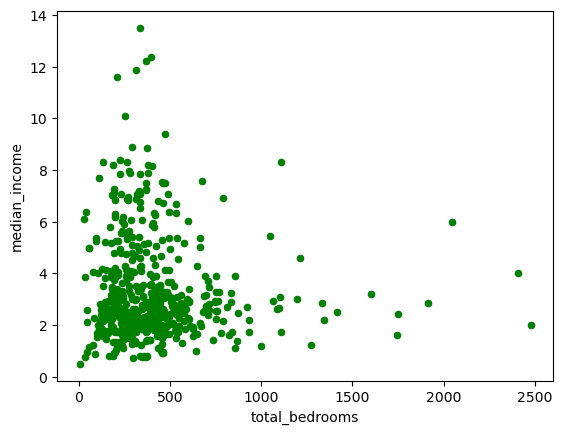

In [13]:
df.plot(x='total_bedrooms', y='median_income', kind='scatter', c='GREEN')

In [14]:
df = df.dropna()

I will use this dataset to solve a simple problem with linear regression: given a medium house_hold income to predict the number of bedrooms.

## 1.0 Linear Regression in Python with NumPy and Scikit-Learn

In [15]:
#Save the required field of the DataFrame into variables X and Y
X = df['total_bedrooms']
Y = df['median_income']

### 1.1 Linear Regression with NumPy

Using the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [16]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: -0.00041466543515910123. Intercept: 3.51389971600603


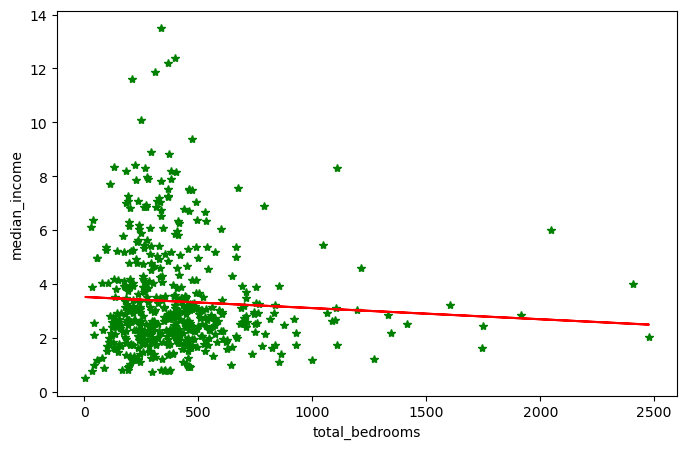

In [17]:
# plot the linear regression line . The regression line is red.
def plot_linear_regression(X, Y, x_label, y_label, m, b, X_pred=np.array([]), Y_pred=np.array([])):
    fig, ax = plt.subplots(1,1,figsize=(8,5))
    ax.plot(X, Y, '*', color='green')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.plot(X, m*X + b, color='red')
    # Plot prediction points (empty arrays by default - the predictions will be calculated later).
    ax.plot(X_pred, Y_pred, '*', color='blue', markersize=8)
    
plot_linear_regression(X, Y, 'total_bedrooms', 'median_income', m_numpy, b_numpy)

 Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [18]:
def pred_numpy(m, b, X):
    Y = m*X + b
    return Y

In [19]:
df.head()

,median_income,total_bedrooms
0,8.3252,129.0
1,8.3014,1106.0
2,7.2574,190.0
3,5.6431,235.0
4,3.8462,280.0


In [20]:
X_pred = np.array([8.1257, 6.0431, 2.9431])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"Medium household income:\n{X_pred}")
print(f"Predictions of bedrooms using NumPy linear regression:\n{Y_pred_numpy}")

Medium household income:
[8.1257 6.0431 2.9431]
Predictions of bedrooms using NumPy linear regression:
[3.51053027 3.51139385 3.51267931]


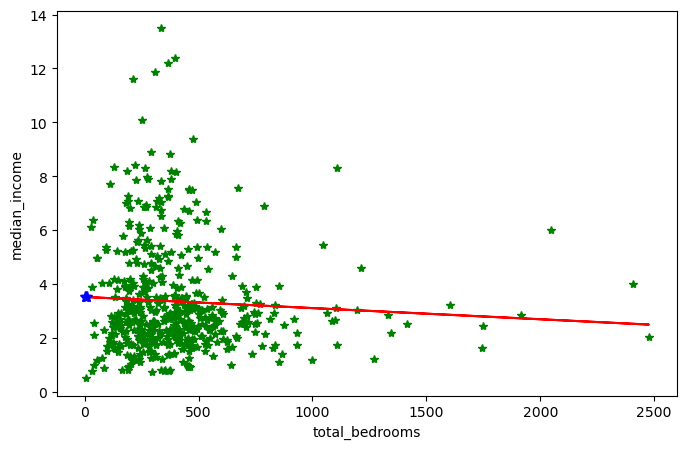

In [21]:
plot_linear_regression(X, Y, 'total_bedrooms', 'median_income', m_numpy, b_numpy, X_pred, Y_pred_numpy)

## 2.0  Linear Regression with Scikit-Learn

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method.

**Create an estimator object for a linear regression model:**
The estimator can learn from data calling the fit function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:    

In [22]:
lr_sklearn = LinearRegression()

In [23]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

Shape of X array: (514,)
Shape of Y array: (514,)
Expected 2D array, got 1D array instead:
array=[ 129. 1106.  190.  235.  280.  213.  489.  687.  665.  707.  434.  752.
  474.  191.  626.  283.  347.  293.  455.  298.  184.  367.  541.  337.
  437.  123.  244.  421.  492.  160.  447.  481.  409.  366.  574.  282.
  432.  390.  330.  715.  419.  311.  202.  202.  311.  420.  322.  312.
  195.  375.  453.  456.  853.  456.  235.  243.  288.  335.  341.   43.
  211.   29.  190.  237.  182.  209.  354.  244.  109.  644.  152.  297.
  204.    4.  161.  462.  562.  243.  374.  176.  289.   56.   97.  164.
  184.  143.  451.  348.   42.   78.  392.   87.   31.  347.  623. 2477.
 1331.  107. 1270. 1085. 1414. 1603.  242.  701. 1914.  225.  482.  460.
  751.  855.  289. 1098. 1196.  559.  428.  287. 1750. 1105.  399.  454.
  406.   54.  411.  574.  365. 1048.  473.  597.  674.  346.  490.  210.
  460.  788.  184.  223.  271.  264.  181.  534.   38.  333.  436.  605.
  535.  212.  335.  465.  4

Increase the dimension of the array by one with reshape function:

In [24]:
X_sklearn = X.to_numpy()[:, np.newaxis]
Y_sklearn = Y.to_numpy()[:, np.newaxis]

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")

Shape of new X array: (514, 1)
Shape of new Y array: (514, 1)


Fitting the linear regression model passing X_sklearn and Y_sklearn arrays into the function lr_sklearn.fit

In [25]:
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [26]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[-0.00041467]]. Intercept: [3.51389972]


Note that you have got the similar result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`. 

Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [27]:
def pred_sklearn(X, lr_sklearn):
    X_2D = X[:, np.newaxis]
    Y = lr_sklearn.predict(X_2D)
    return Y

In [28]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"Medium household income:\n{X_pred}")
print(f"Predictions of bedrooms using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

Medium household income:
[8.1257 6.0431 2.9431]
Predictions of bedrooms using Scikit_Learn linear regression:
[[3.51053027 3.51139385 3.51267931]]


The predicted values are also the same.

## Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 = 
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [29]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [30]:
X_norm 


0     -0.962366
1      2.387830
2     -0.753193
3     -0.598886
4     -0.444578
         ...   
511   -0.255979
512   -0.149678
513   -0.098242
514   -0.046806
515   -0.561166
Name: total_bedrooms, Length: 514, dtype: float64

In [31]:
Y_norm 

0      2.481499
1      2.469643
2      1.949547
3      1.145341
4      0.250168
         ...   
511    5.058964
512    4.418708
513    2.412751
514    4.501704
515    1.270732
Name: median_income, Length: 514, dtype: float64

In [32]:
# Define cost function
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

Define functions dEdm and dEdb to calculate partial derivatives. This can be done using vector form of the input data X and Y.

In [36]:
#partial derivative of E with respect to m
def dEdm(m, b, X, Y):
    res = 1/len(X)*np.dot(m*X + b - Y, X)  
    return res
    
#partial derivative of E with respect to b
def dEdb(m, b, X, Y):
    res = 1/len(X)*np.sum(m*X + b - Y)
    return res


In [35]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(2, 8, X_norm, Y_norm))
print(dEdb(2, 8, X_norm, Y_norm))

0.060242796031154136
2.764757726692997e-16
2.0602427960311536
8.0


**Implementing gradient descent using expressions** $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [41]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):
        m_new = m - learning_rate*dEdm(m,b,X,Y)
        b_new = b - learning_rate*dEdb(m,b,X,Y)
        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {E(m, b, X, Y)}")
        
    return m, b

In [42]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(-0.038091795555088376, -1.8383565314213291e-16)
(0.8986217838566376, 4.521910375044022)


In [43]:
# Now run the gradient descent method starting from the initial point  (𝑚0,𝑏0)=(0,0)
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial, 
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}") 

Cost after iteration 0: 0.4982579866526474
Cost after iteration 1: 0.4981883061187534
Cost after iteration 2: 0.4981855188973977
Cost after iteration 3: 0.4981854074085434
Cost after iteration 4: 0.49818540294898916
Cost after iteration 5: 0.498185402770607
Cost after iteration 6: 0.49818540276347184
Cost after iteration 7: 0.4981854027631863
Cost after iteration 8: 0.498185402763175
Cost after iteration 9: 0.49818540276317447
Cost after iteration 10: 0.49818540276317447
Cost after iteration 11: 0.49818540276317447
Cost after iteration 12: 0.49818540276317447
Cost after iteration 13: 0.49818540276317447
Cost after iteration 14: 0.49818540276317447
Cost after iteration 15: 0.49818540276317447
Cost after iteration 16: 0.49818540276317447
Cost after iteration 17: 0.49818540276317447
Cost after iteration 18: 0.49818540276317447
Cost after iteration 19: 0.49818540276317447
Cost after iteration 20: 0.49818540276317447
Cost after iteration 21: 0.49818540276317447
Cost after iteration 22: 0.49

Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [44]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"Medium household income::\n{X_pred}")
print(f"Predictions of bedrooms using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of bedrooms using Gradient Descent:\n{Y_pred_gd}")

Medium household income::
[ 50 120 280]
Predictions of bedrooms using Scikit_Learn linear regression:
[[3.51053027 3.51139385 3.51267931]]
Predictions of bedrooms using Gradient Descent:
[3.49316644 3.46413986 3.39779339]


Now comparing the prediction results of the three methodologies used in the optimization scenarios:
Predictions of bedrooms using NumPy linear regression:
[3.51053027 3.51139385 3.51267931]
Predictions of bedrooms using Scikit_Learn linear regression:
[[3.51053027 3.51139385 3.51267931]]
Predictions of bedrooms using Gradient Descent:
[3.49316644 3.46413986 3.39779339]